In [1]:
import pandas as pd
from collections import Counter
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, theme_minimal, geom_col, theme_classic, save_as_pdf_pages
import networkx as nx
import matplotlib.pyplot as plt
import random
import re


/home/djl294/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("extracell_hits_prob1_TM50_qcov80_bact_arch.DeeplocExtracell.m8", header=None, sep="\t")
headers = "query,target,pident,alntmscore,prob,evalue,bits,alnlen,qstart,qend,tstart,tend,qseq,tseq,qcov,tcov"
headers = headers.split(",")
df.columns = headers
df

,query,target,pident,alntmscore,prob,evalue,bits,alnlen,qstart,qend,tstart,tend,qseq,tseq,qcov,tcov
0,P05230,A0A316QH20,9.2,0.7993,1.0,1.055000e-06,267,141,21,151,762,900,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MTKINRRIKFISLLLCILLLLANFPISSVALDSARAYPVQPAVDDP...,0.845,0.128
1,P05230,A0A316QFT1,15.4,0.7729,1.0,9.434000e-07,260,142,20,149,756,892,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MKRRRQFKVIAFLLALVMLFGMMPVTALELETTTGEISTPEAETAV...,0.839,0.121
2,P05230,A0A255TDF8,13.7,0.7797,1.0,4.514000e-06,244,145,19,151,487,627,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MRTKQLLLALLLSLIGIHVAEAESYTPVKGGKIVTDDGIYIVTGDN...,0.858,0.142
3,P05230,A0A174S049,11.8,0.7696,1.0,4.514000e-06,240,144,21,150,378,518,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MLKKLKPILFSVLSCSLLFSTNINNNLVTANATTNSNIAKGADIGW...,0.839,0.271
4,P05230,A0A0W7TLT4,11.8,0.7901,1.0,7.060000e-06,240,143,17,150,350,488,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MKRSLALILSLVLIFSCIGIPAIAAEASPISNMTALFTKPEGNFYN...,0.865,0.218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,P27487,A0A0M4GV15,10.2,0.5170,1.0,6.698000e-21,470,850,45,761,76,775,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MSTDALRPSPESDADPAGAGDRPDAAGPDGSRTGPGLPPVPAWLDE...,0.936,0.894
1457,P27487,A0A220UD45,8.4,0.5491,1.0,7.926000e-20,465,781,55,764,97,705,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MSQHTVSSTSSLRGAAEGALRSAPRPAPRHAERSLFGDTVPVPYRW...,0.927,0.857
1458,P27487,A0A135Z2F9,10.4,0.5396,1.0,7.926000e-20,463,940,45,766,77,881,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MEENMDIFNTCDCDSSAKCDENNSVNPPVAEKIPEKREYHGDIFID...,0.943,0.913
1459,P27487,A0A2W6UDP8,11.4,0.5068,1.0,2.950000e-20,445,844,56,762,61,757,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MHNVSMTDLPPVPAWLDEIEGERALAWVAEHNAATRAVVEGTERFE...,0.923,0.918


In [3]:
hacc2name = pd.read_csv("hacc2name",  sep="\t")

hacc2name_dict = {}


haccs = list(hacc2name['From'])
names = list(hacc2name['Entry Name'])
for i in range(len(haccs)):
    hacc2name_dict[haccs[i]] = names[i].removesuffix("_HUMAN")

df['name'] = df['query'].map(hacc2name_dict)
df



,query,target,pident,alntmscore,prob,evalue,bits,alnlen,qstart,qend,tstart,tend,qseq,tseq,qcov,tcov,name
0,P05230,A0A316QH20,9.2,0.7993,1.0,1.055000e-06,267,141,21,151,762,900,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MTKINRRIKFISLLLCILLLLANFPISSVALDSARAYPVQPAVDDP...,0.845,0.128,FGF1
1,P05230,A0A316QFT1,15.4,0.7729,1.0,9.434000e-07,260,142,20,149,756,892,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MKRRRQFKVIAFLLALVMLFGMMPVTALELETTTGEISTPEAETAV...,0.839,0.121,FGF1
2,P05230,A0A255TDF8,13.7,0.7797,1.0,4.514000e-06,244,145,19,151,487,627,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MRTKQLLLALLLSLIGIHVAEAESYTPVKGGKIVTDDGIYIVTGDN...,0.858,0.142,FGF1
3,P05230,A0A174S049,11.8,0.7696,1.0,4.514000e-06,240,144,21,150,378,518,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MLKKLKPILFSVLSCSLLFSTNINNNLVTANATTNSNIAKGADIGW...,0.839,0.271,FGF1
4,P05230,A0A0W7TLT4,11.8,0.7901,1.0,7.060000e-06,240,143,17,150,350,488,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,MKRSLALILSLVLIFSCIGIPAIAAEASPISNMTALFTKPEGNFYN...,0.865,0.218,FGF1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,P27487,A0A0M4GV15,10.2,0.5170,1.0,6.698000e-21,470,850,45,761,76,775,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MSTDALRPSPESDADPAGAGDRPDAAGPDGSRTGPGLPPVPAWLDE...,0.936,0.894,DPP4
1457,P27487,A0A220UD45,8.4,0.5491,1.0,7.926000e-20,465,781,55,764,97,705,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MSQHTVSSTSSLRGAAEGALRSAPRPAPRHAERSLFGDTVPVPYRW...,0.927,0.857,DPP4
1458,P27487,A0A135Z2F9,10.4,0.5396,1.0,7.926000e-20,463,940,45,766,77,881,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MEENMDIFNTCDCDSSAKCDENNSVNPPVAEKIPEKREYHGDIFID...,0.943,0.913,DPP4
1459,P27487,A0A2W6UDP8,11.4,0.5068,1.0,2.950000e-20,445,844,56,762,61,757,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,MHNVSMTDLPPVPAWLDEIEGERALAWVAEHNAATRAVVEGTERFE...,0.923,0.918,DPP4


[('FGF1', 369), ('FGF22', 142), ('LEG1', 124), ('PGRP1', 111), ('CATG', 104), ('IL1FA', 94), ('I36RA', 87), ('IL36A', 79), ('ANGT', 79), ('DPP4', 60), ('IL36G', 43), ('IL1RA', 29), ('FGF16', 23), ('IL18', 21), ('REG1A', 17), ('IL27B', 16), ('FGF7', 11), ('FGF17', 10), ('FGF6', 6), ('FGF20', 6)]


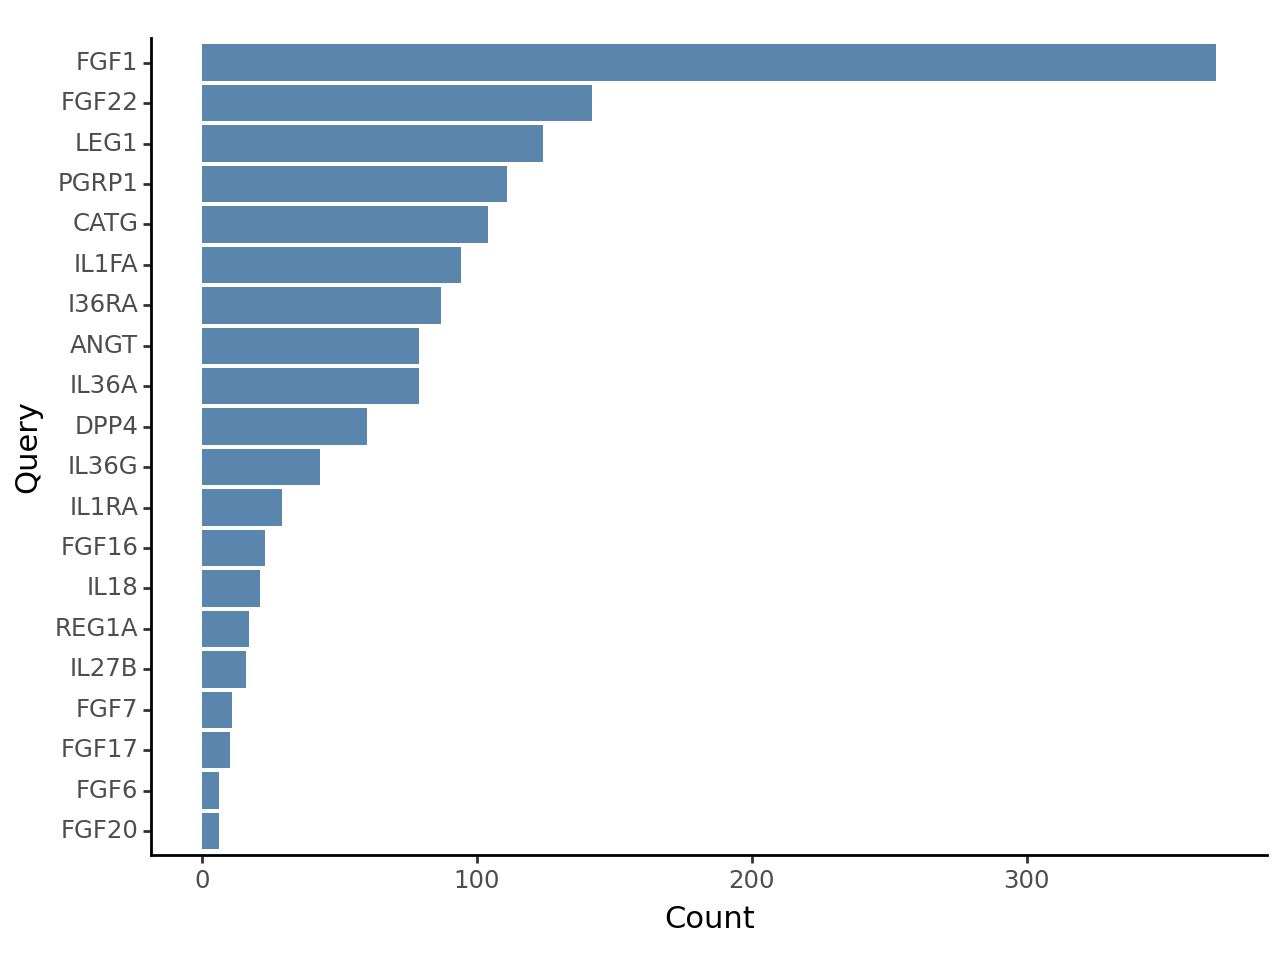

/home/djl294/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/djl294/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: alnmnt_counts.svg


In [4]:
haccs = list(df['name'])
counts = Counter(haccs)
top_n = counts.most_common(20)
print(top_n)


# Convert it to a DataFrame
top_n_df = pd.DataFrame(top_n, columns=['query', 'count'])
top_n_df = top_n_df.sort_values('count')

# Convert 'query' to a categorical type with the order set by the sorted counts
top_n_df['query'] = pd.Categorical(top_n_df['query'], categories=top_n_df['query'], ordered=True)

# Create the plot
plot = (ggplot(top_n_df, aes(x='query', y='count'))
        + geom_col(fill='xkcd:dusty blue')
        + coord_flip()  # Flips the axes to make it horizontal
        + labs(title='', x='Query', y='Count')
        + theme_classic()
       )  


# Display the plot
print(plot)
# Save the plot using plotnine's save function
plot.save("alnmnt_counts.svg", dpi=300, format='svg')

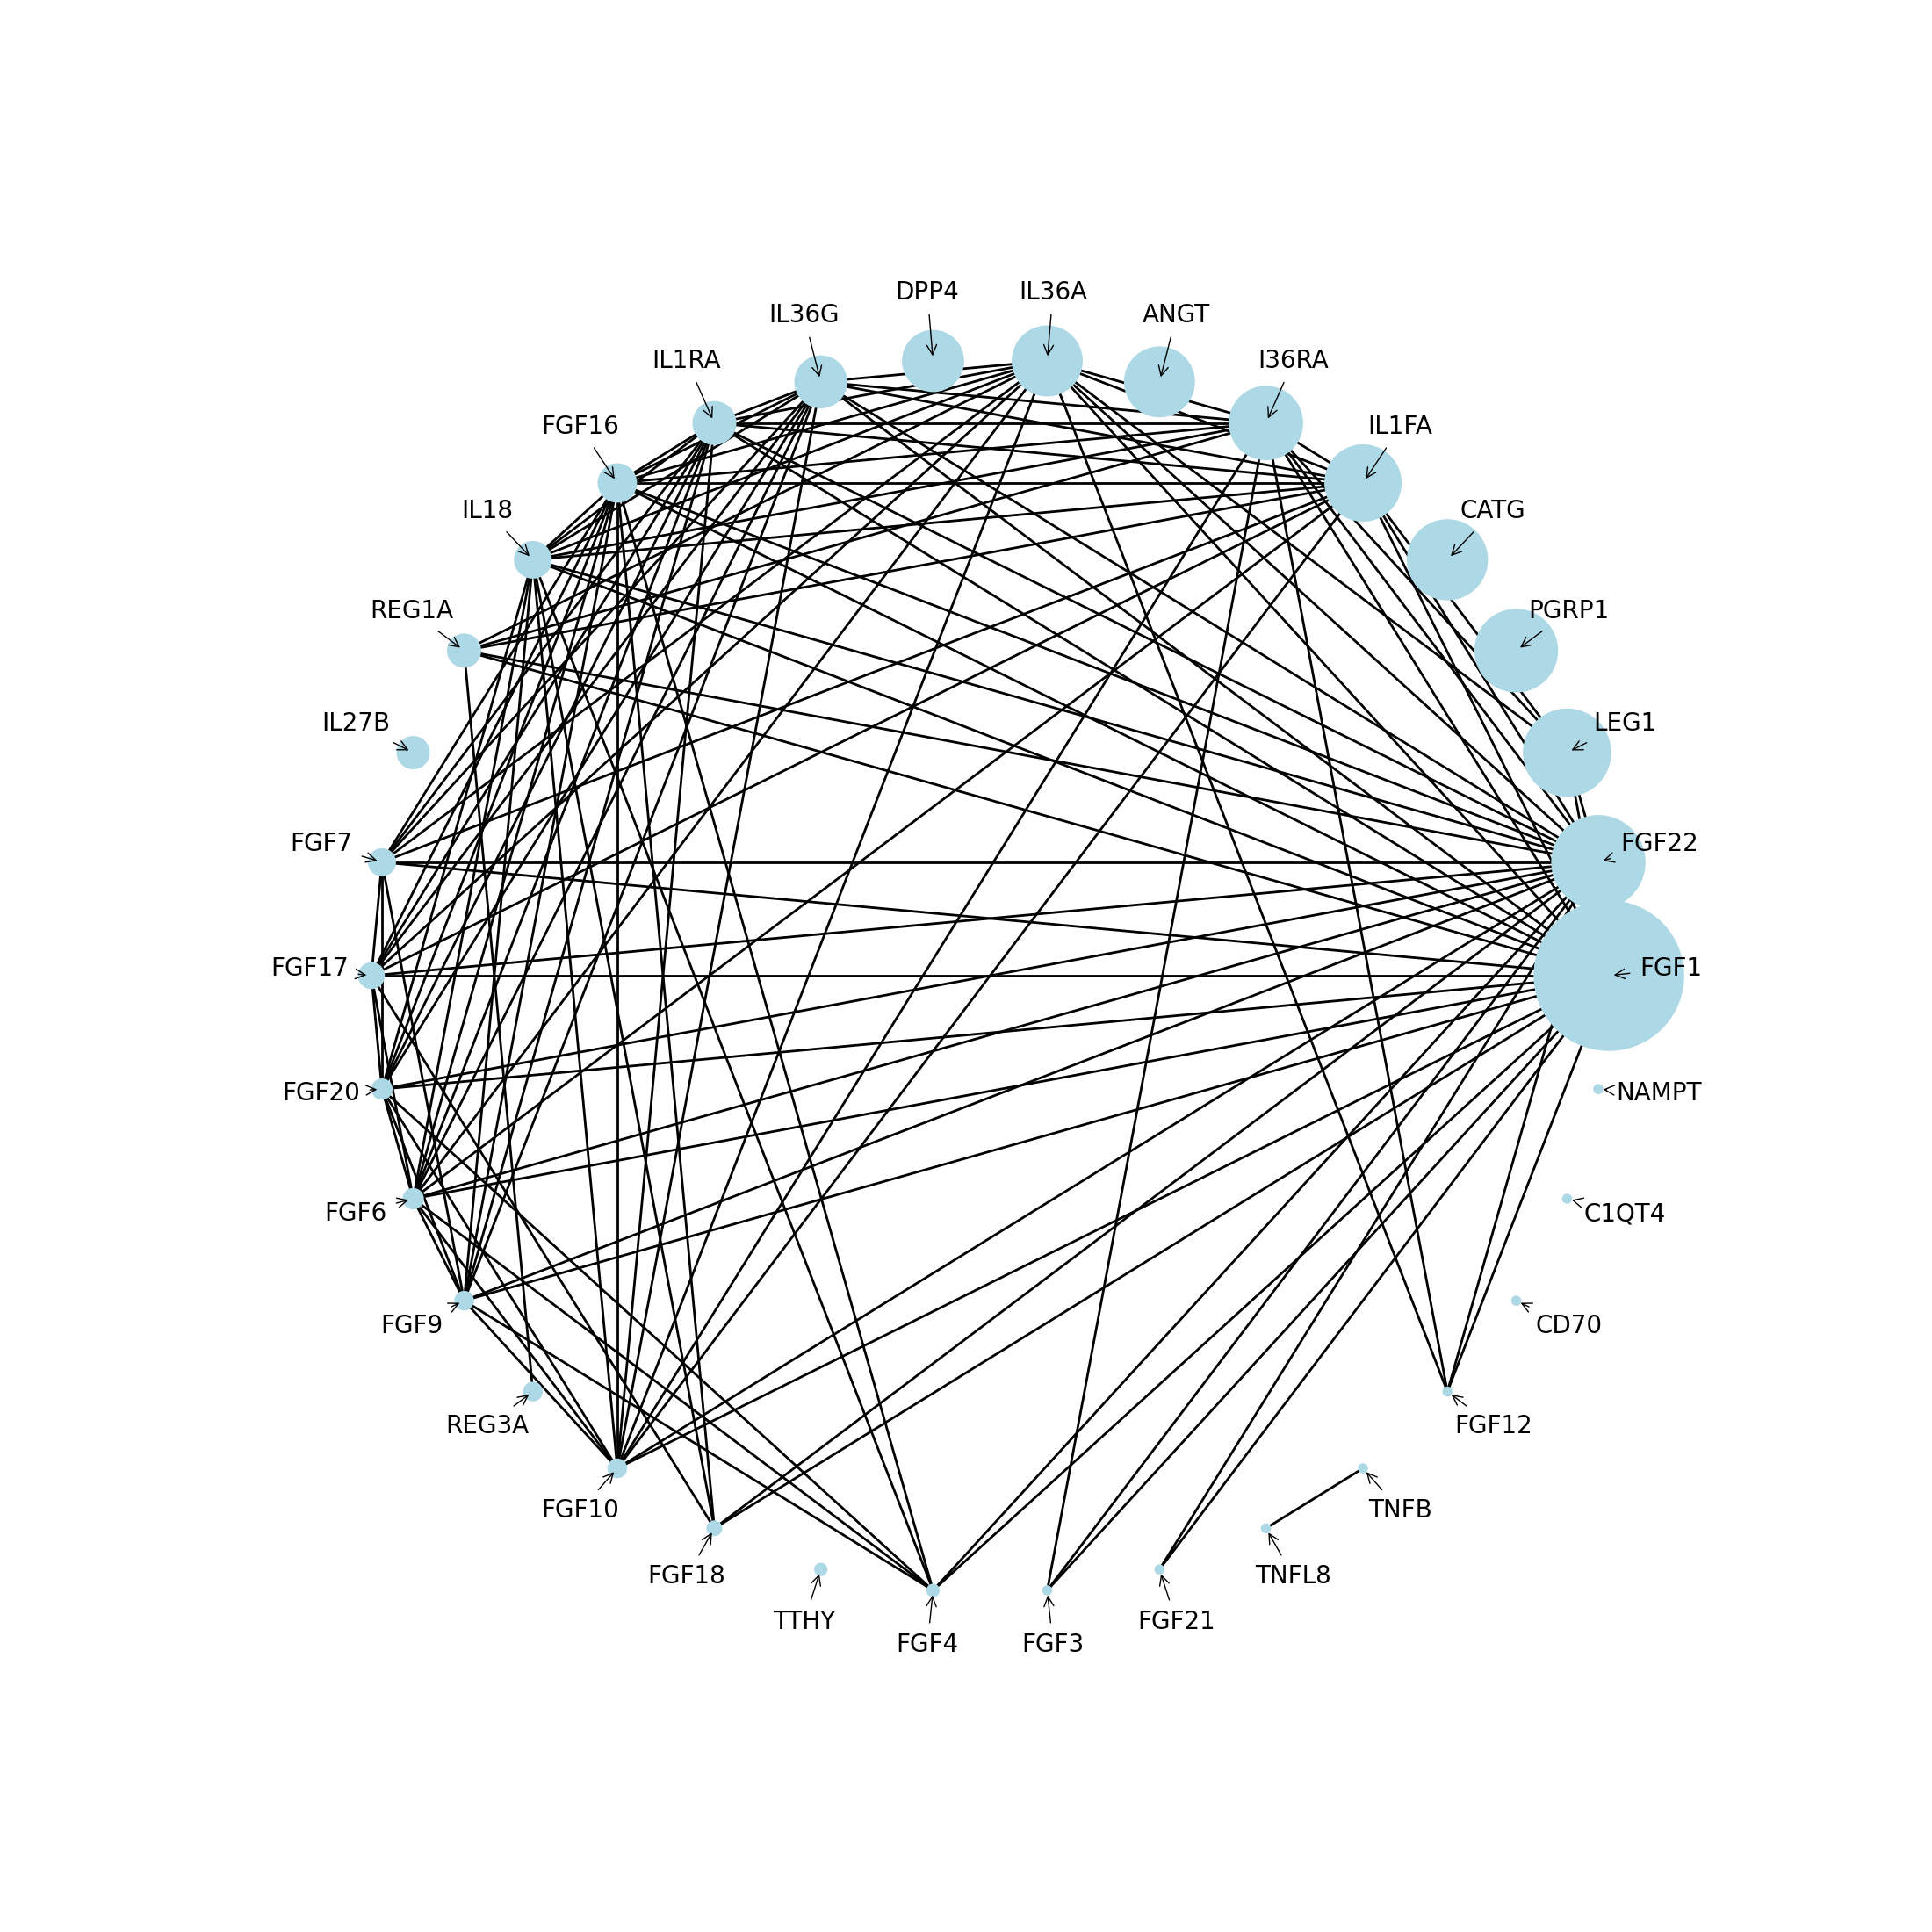

In [5]:
# Create a graph
G = nx.Graph()

# Add nodes with sizes

name_counts = df['name'].value_counts()
for name, count in name_counts.items():
    G.add_node(name, size=count)

# Add edges
for target in df['target'].unique():
    connected_names = df[df['target'] == target]['name'].tolist()
    for i in range(len(connected_names)):
        for j in range(i + 1, len(connected_names)):
            if not G.has_edge(connected_names[i], connected_names[j]):
                G.add_edge(connected_names[i], connected_names[j], label=target)

# Increase figure size
plt.figure(figsize=(11, 11))

# Visualize the network
pos = nx.circular_layout(G)
node_sizes = [G.nodes[node]['size']*10 for node in G.nodes]  # Adjust scaling factor for visualization

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos)

# Annotate labels as callouts
for node, (x, y) in pos.items():
    plt.annotate(
        node,
        xy=(x, y),  # Node position
        xytext=(1.1 * x, 1.1 * y),  # Position of the label/callout
        arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5),
        fontsize=10,
        ha='center'
    )

#plt.title('Network of Pairwise Alignments')
plt.axis('off')
plt.show()

Clusters and their identifiers:
Cluster 1: O15520, O43320, O60258, O76093, P05230, P05451, P08620, P09382, P10767, P11487, P18510, P21781, P31371, P61328, Q06141, Q14116, Q8WWZ1, Q9HCT0, Q9NP95, Q9NSA1, Q9NZH8, Q9UBH0, Q9UHA7
Cluster 2: O75594
Cluster 3: P08311
Cluster 4: P01019
Cluster 5: P27487
Cluster 6: Q14213
Cluster 7: P02766
Cluster 8: P01374, P32971
Cluster 9: P32970
Cluster 10: Q9BXJ3
Cluster 11: P43490


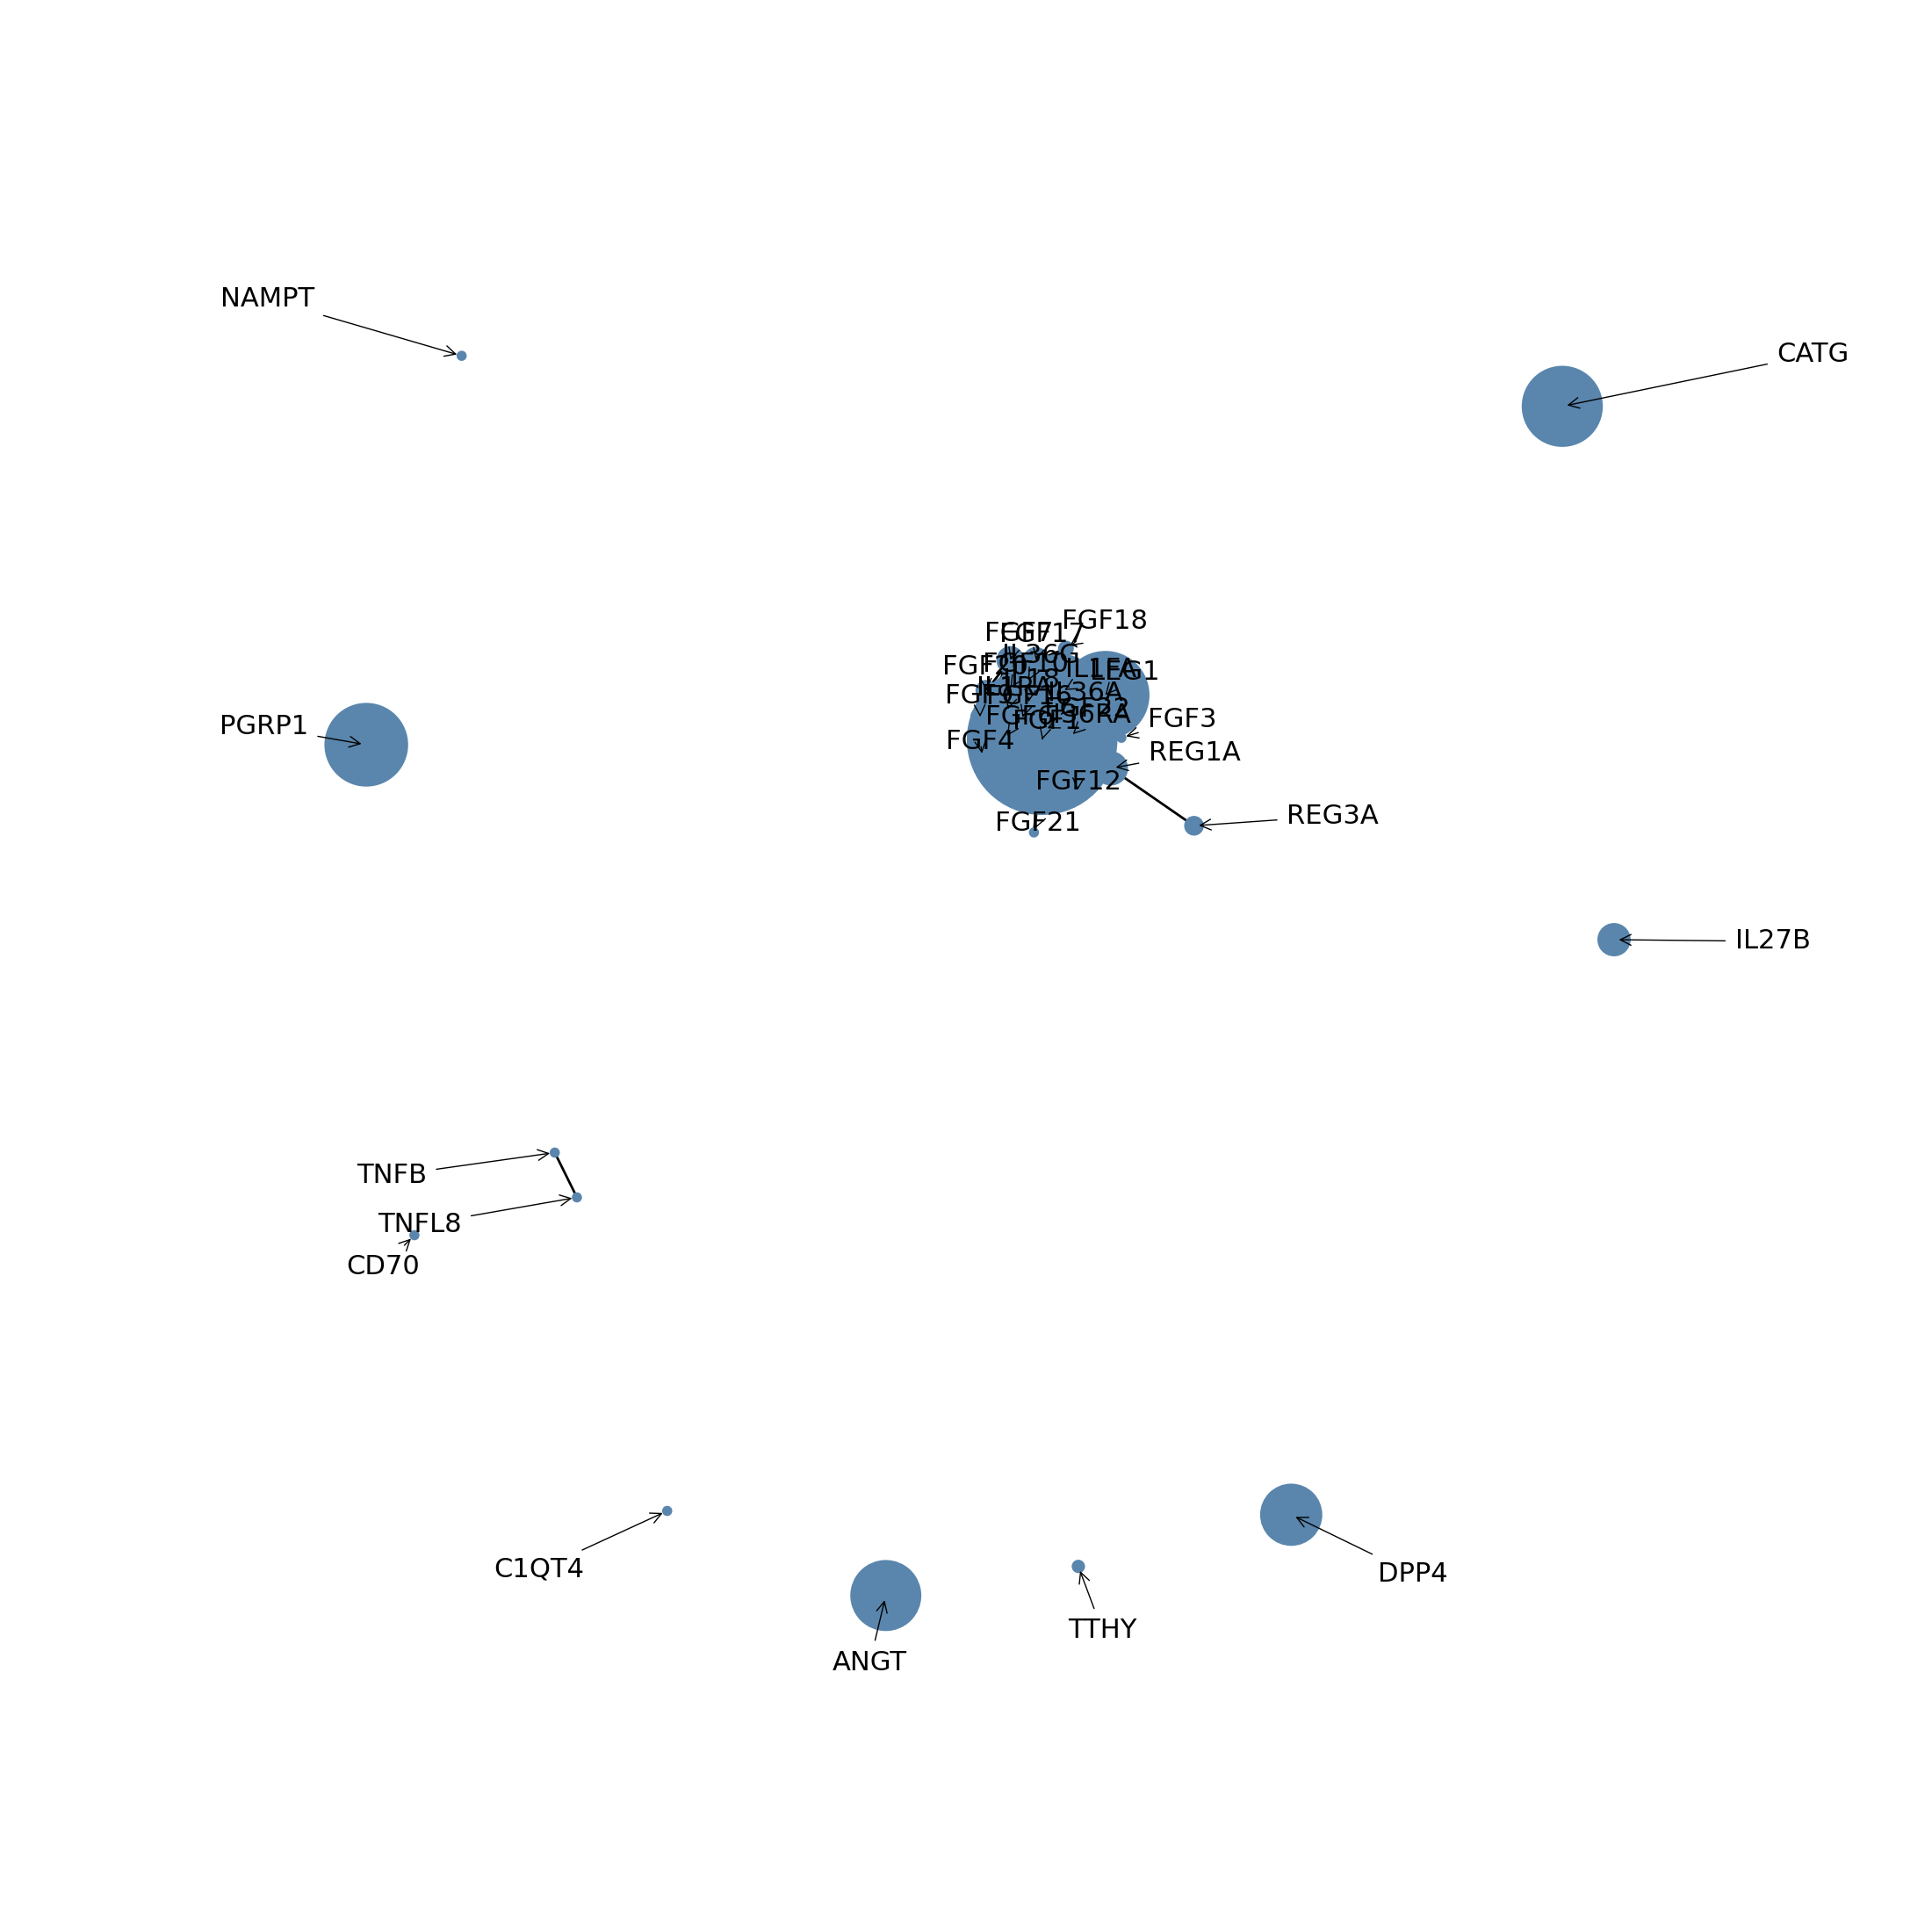

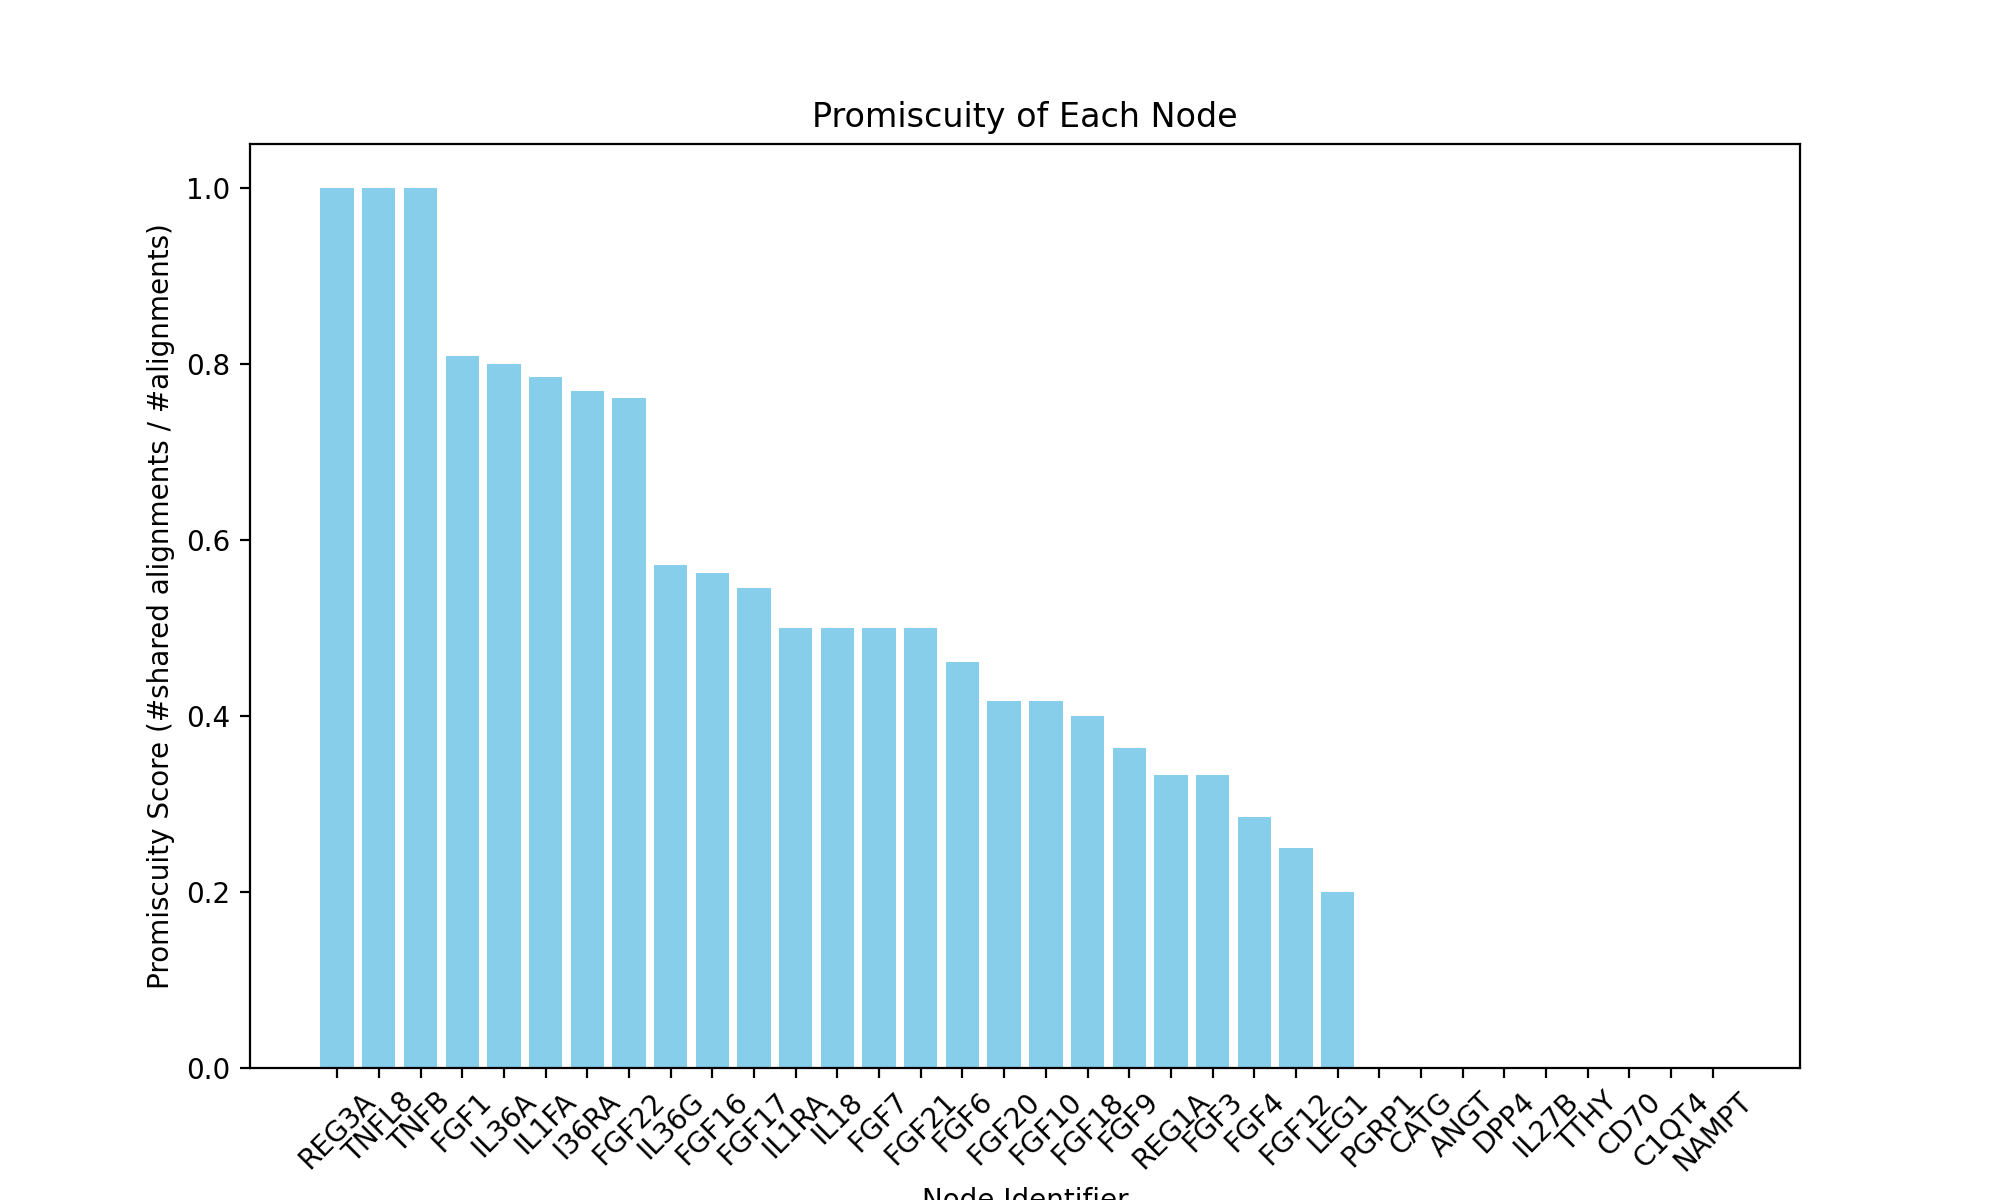

In [6]:

# Example hacc2name_dict
# hacc2name_dict = { "id1": "name1", "id2": "name2", ... }

# Create a graph
G = nx.Graph()

# Add nodes with sizes
name_counts = df['name'].value_counts()
for name, count in name_counts.items():
    G.add_node(name, size=count)

# Add edges
for target in df['target'].unique():
    connected_names = df[df['target'] == target]['name'].tolist()
    for i in range(len(connected_names)):
        for j in range(i + 1, len(connected_names)):
            if not G.has_edge(connected_names[i], connected_names[j]):
                G.add_edge(connected_names[i], connected_names[j], label=target)

# Calculate promiscuity for each node
promiscuity_scores = {}
for node in G.nodes:
    total_alignments = len(list(G.edges(node)))
    shared_alignments = len(set([G.edges[edge]['label'] for edge in G.edges(node)]))
    promiscuity = shared_alignments / total_alignments if total_alignments > 0 else 0
    promiscuity_scores[node] = promiscuity

# Sort by promiscuity score
sorted_promiscuity = sorted(promiscuity_scores.items(), key=lambda x: x[1], reverse=True)

# Find and print clusters by identifiers, save in dictionary

cluster_dict = {}
clusters = list(nx.connected_components(G))
print("Clusters and their identifiers:")
for i, cluster in enumerate(clusters):
    cluster_identifiers = [key for key, name in hacc2name_dict.items() if name in cluster]
    print(f"Cluster {i + 1}: {', '.join(cluster_identifiers)}")
    cluster_dict[i] = cluster_identifiers
    

# Plot network
plt.figure(figsize=(11, 11))
pos = nx.spring_layout(G, seed=51)
node_sizes = [G.nodes[node]['size']*10 for node in G.nodes]  # Adjust scaling factor for visualization

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='xkcd:dusty blue', margins=.1)
nx.draw_networkx_edges(G, pos)

n = 0 # initiate number
for node, (x, y) in pos.items():
    n += 1
    random.seed(n)
    shift = random.uniform(1, 1.7)
    plt.annotate(
        node,
        xy=(x, y),
        xytext=(shift * x, 1.1 * y),
        arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5),
        fontsize=11,
        ha='center'
    )

plt.axis('off')
plt.savefig("promiscuity_network.svg", format='svg', bbox_inches='tight')  # 'bbox_inches' ensures tight layout
plt.show()

# Plot barplot for promiscuity
names, promiscuity_values = zip(*sorted_promiscuity)
plt.figure(figsize=(10, 6))
plt.bar(names, promiscuity_values, color='skyblue')
plt.xlabel('Node Identifier')
plt.ylabel('Promiscuity Score (#shared alignments / #alignments)')
plt.title('Promiscuity of Each Node')
plt.xticks(rotation=45)
plt.show()

In [7]:
FGF_clust_list = cluster_dict[0]
#All Metagenome accessions in the FGF clsuter of the network
FGF_clust_mimic_list = []
for fgf in FGF_clust_list:
    with open ("FGF_cluster_mimic_list", "a+") as f:
        for i, row in df.iterrows():
            if row[0] == fgf and row[1] not in FGF_clust_mimic_list:
                FGF_clust_mimic_list.append(str(row[1]))
                f.write(str(row[1]))
                f.write("\n")

                
#All Metagenome accessions in the FGF clsuter of the network, with >= 80% Taregt Coverage
FGF_clust_mimic_list_tcov80 = []
for fgf in FGF_clust_list:
    with open ("FGF_cluster_mimic_list_tcov80", "a+") as f:
        for i, row in df.iterrows():
            if row[0] == fgf and row[1] not in FGF_clust_mimic_list_tcov80 and row[15] >= 0.8: 
                FGF_clust_mimic_list_tcov80.append(str(row[1]))
                f.write(str(row[1]))
                f.write("\n")


/tmp/ipykernel_1587992/4049277824.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_1587992/4049277824.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_1587992/4049277824.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_1587992/4049277824.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

In [8]:
FGF_cluster_mimic_idas = pd.read_csv("FGF_cluster_mimic_idas", sep=",", header=None)
FGF_cluster_mimic_idas 


FGF_cluster_mimic_ida_dict = {}
for index, row in FGF_cluster_mimic_idas.iterrows():
    acc = str(row[0])
    ida = str(row[1])
    ipr_identifiers = re.findall(r'IPR\d+', ida)
    ipr_ida = '-'.join(ipr_identifiers)
    FGF_cluster_mimic_ida_dict[row[0]] = ipr_ida
    
    
FGF_cluster_mimic_ida_dict 




{'A0A1C5WSJ1': 'IPR022768',
 'A0A316RZS5': 'IPR000772-IPR000772-IPR000772-IPR014867-IPR014867',
 'A0A1C6A9I1': 'IPR000772-IPR000772-IPR000772-IPR002105',
 'A0A1C6EWE5': 'IPR000772-IPR000772-IPR003343-IPR003343',
 'B0MJQ2': 'IPR000772-IPR003961-IPR003961-IPR003961-IPR003961',
 'A0A0B3VK92': 'IPR022768',
 'A0A069K227': 'IPR000772-IPR000772-IPR005193',
 'A0A1C6DAC2': 'IPR022768',
 'A0A1Q6LD13': 'IPR000772-IPR000772-IPR000772-IPR000772-IPR002053',
 'A0A374TUP2': 'IPR000772',
 'U2KXV3': 'IPR002022-IPR000772-IPR000772-IPR000772-IPR002105',
 'A0A374VGK1': 'IPR000772-IPR000772-IPR000772-IPR000772-IPR000772-IPR000772-IPR000772-IPR000772-IPR000064',
 'A0A3C0QRZ3': 'IPR000772',
 'A0A3C1H421': 'IPR000772-IPR002022',
 'F3QXP6': 'IPR039514',
 'A0A2K2U8X2': 'IPR000772-IPR000772-IPR000772-IPR000772-IPR005490',
 'A0A0P0FVG6': 'IPR041542',
 'U2PT89': 'IPR002508-IPR000772-IPR001119-IPR001119-IPR001119',
 'A0A1H7W7K0': 'IPR000772-IPR000772-IPR001547',
 'A0A1C6CDG4': 'IPR000772-IPR001119-IPR001119-IPR00111